## <center> SVM and KNN Extended project <center>
<center>Angelo Di Gianvito<center>

### Importing Funcitons

In [293]:
# Basic DataScience packages
import matplotlib.pylab as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from numpy import random
import datetime as dt
import category_encoders as ce
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine learning libraries and functions
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn import preprocessing
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 

# Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Importing data

Data is imported from the three available datasets

In [294]:
data_train = pd.read_csv('/Users/user/Desktop/BSE/COURSES/TERM 2/DEEP LEARNING/PROJECTS/SVM & KNN/dl24-probability-of-death-with-k-nn (1)/mimic_train.csv')
data_test = pd.read_csv('/Users/user/Desktop/BSE/COURSES/TERM 2/DEEP LEARNING/PROJECTS/SVM & KNN/dl24-probability-of-death-with-k-nn (1)/mimic_test_death.csv')
data_diagnoses = pd.read_csv('/Users/user/Desktop/BSE/COURSES/TERM 2/DEEP LEARNING/PROJECTS/SVM & KNN/dl24-probability-of-death-with-k-nn (1)/MIMIC_diagnoses.csv')

### Creating the DataFrames

In [295]:
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)
df_diagnoses = pd.DataFrame(data_diagnoses)
df_diagnoses.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,256,108811,1.0,53240
1,256,108811,2.0,41071
2,256,108811,3.0,53560
3,256,108811,4.0,40390
4,256,108811,5.0,5859


The columns in the diagnoses dataset will be renamed to match the names they have in the main data and allow merging later on.

In [296]:
df_diagnoses.rename(columns={'SUBJECT_ID': 'subject_id','HADM_ID': 'hadm_id','ICD9_CODE': 'ICD9_diagnosis'}, inplace=True)

## Exploratory Data Analysis (EDA)

### Summary Statistics main data

In [297]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

print(f"The train data has a shape of {df_train.shape[0]} rows and {df_train.shape[1]} columns.\n\nThe test data has a shape of {df_test.shape[0]} rows and {df_test.shape[1]} columns.")

print(f"\nThe descriptives of the train Dataframe are the following:")
display(df_train.describe())

The train data has a shape of 20885 rows and 44 columns.

The test data has a shape of 5221 rows and 39 columns.

The descriptives of the train Dataframe are the following:


,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,Diff,LOS
count,20885.000000,20885.000000,20885.000000,20885.000000,18698.000000,18698.000000,18698.000000,18677.000000,18677.000000,18677.000000,18676.000000,18676.000000,18676.000000,18699.000000,18699.000000,18699.000000,18696.000000,18696.000000,18696.000000,18388.000000,18388.000000,18388.000000,18682.000000,18682.000000,18682.000000,20632.000000,20632.000000,20632.000000,20885.000000,20885.000000
mean,0.112282,58950.496098,150082.402298,250202.495523,69.705904,105.239801,85.180250,91.110564,150.725920,119.145423,44.327854,88.360784,62.511614,56.293064,107.074282,77.609535,11.919207,27.780220,18.985855,36.051208,37.428781,36.751717,91.007494,99.555883,96.866685,106.781975,182.129604,138.856428,-51617.069830,3.701046
std,0.315720,25299.439535,28898.479845,28909.806302,14.869840,20.922613,15.318208,17.532534,23.833793,16.701503,11.909852,19.285554,11.010790,14.348780,27.585990,11.113299,3.572189,6.278514,3.849713,0.732124,0.799897,0.603476,7.399390,1.159792,2.333108,35.178811,92.665603,44.933145,10686.395846,5.175721
min,0.000000,23.000000,100001.000000,200001.000000,2.000000,39.000000,34.714286,5.000000,46.000000,46.000000,4.000000,27.000000,17.000000,1.000000,29.000000,25.759907,1.000000,12.000000,9.291667,15.000000,30.800000,30.666667,1.000000,57.000000,47.666667,2.000000,42.000000,42.000000,-72740.274440,0.056600
25%,0.000000,41132.000000,125157.000000,225153.000000,60.000000,90.000000,74.272727,81.000000,134.000000,107.100000,37.000000,75.000000,54.950952,49.000000,91.000000,70.033908,10.000000,23.000000,16.250000,35.666667,36.944444,36.388889,90.000000,100.000000,95.812500,86.000000,126.000000,110.750000,-60864.454110,1.165400
50%,0.000000,60441.000000,150152.000000,250452.000000,69.000000,103.000000,84.131183,90.000000,148.000000,116.901961,44.000000,86.000000,61.423660,57.000000,102.000000,76.294118,12.000000,27.000000,18.382353,36.111111,37.333333,36.731481,92.000000,100.000000,97.142857,102.000000,161.000000,128.666667,-51561.703460,2.020800
75%,0.000000,80286.000000,175017.000000,275303.000000,79.000000,118.000000,95.185588,101.000000,164.000000,129.465116,51.000000,98.000000,68.954545,64.000000,116.000000,84.041774,14.000000,31.000000,21.105543,36.500000,37.888889,37.092593,94.000000,100.000000,98.346154,121.000000,206.000000,154.578571,-42327.560030,3.915800
max,1.000000,99999.000000,199999.000000,299998.000000,141.000000,280.000000,163.875000,181.000000,323.000000,202.172414,105.000000,294.000000,121.489362,122.000000,299.000000,136.652174,31.000000,69.000000,41.235294,40.100000,42.000000,40.238333,100.000000,100.000000,100.000000,563.000000,2440.000000,771.900000,-32157.494580,101.739000


### Summary Statistics diagnoses dataframe


In [298]:
# Display dataframe
print(f"The diagnoese data has shape: {df_diagnoses.shape[0]} rows and {df_diagnoses.shape[1]} columns.")
print("\nDescriptives:")
display(df_diagnoses.describe())

The diagnoese data has shape: 651047 rows and 4 columns.

Descriptives:


,subject_id,hadm_id,SEQ_NUM
count,651047.000000,651047.000000,651000.000000
mean,38971.159758,150017.744819,7.913836
std,29372.198841,28878.068648,6.072633
min,2.000000,100001.000000,1.000000
25%,14562.500000,125028.000000,3.000000
50%,28671.000000,150140.000000,6.000000
75%,63715.000000,174978.000000,11.000000
max,99999.000000,199999.000000,39.000000


### Dropping columns different between train and test

Train and test data have some columns which are not in common and will not be used for encoding purposes, so they will be dropped.

In [299]:
# Get the columns of each DataFrame
train_columns = set(df_train.columns)
test_columns = set(df_test.columns)

# Find the columns that are in df_train but not in df_test
train_not_in_test = train_columns - test_columns

# Find the columns that are in df_test but not in df_train
test_not_in_train = test_columns - train_columns

# Combine both sets to get all different columns
different_columns = train_not_in_test.union(test_not_in_train)

print("Columns to drop because different between df_train and df_test:", different_columns)


Columns to drop because different between df_train and df_test: {'DISCHTIME', 'DOD', 'LOS', 'HOSPITAL_EXPIRE_FLAG', 'DEATHTIME'}


In [300]:
train_not_in_test={'DISCHTIME', 'DOD', 'DEATHTIME'}
df_train.drop(columns=train_not_in_test, inplace=True)

### Variable Types Exploration

In [301]:
# Dataframe variable types
var_types=df_train.dtypes
print(f"\nThe variable types of the train Dataframe are the following:")
display(var_types)



The variable types of the train Dataframe are the following:


HOSPITAL_EXPIRE_FLAG      int64
subject_id                int64
hadm_id                   int64
icustay_id                int64
HeartRate_Min           float64
HeartRate_Max           float64
HeartRate_Mean          float64
SysBP_Min               float64
SysBP_Max               float64
SysBP_Mean              float64
DiasBP_Min              float64
DiasBP_Max              float64
DiasBP_Mean             float64
MeanBP_Min              float64
MeanBP_Max              float64
MeanBP_Mean             float64
RespRate_Min            float64
RespRate_Max            float64
RespRate_Mean           float64
TempC_Min               float64
TempC_Max               float64
TempC_Mean              float64
SpO2_Min                float64
SpO2_Max                float64
SpO2_Mean               float64
Glucose_Min             float64
Glucose_Max             float64
Glucose_Mean            float64
GENDER                   object
DOB                      object
ADMITTIME                object
Diff    

In [302]:
print('Column list:\n',df_train.columns)

Column list:
 Index(['HOSPITAL_EXPIRE_FLAG', 'subject_id', 'hadm_id', 'icustay_id',
       'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'GENDER', 'DOB', 'ADMITTIME', 'Diff', 'ADMISSION_TYPE',
       'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS',
       'ICD9_diagnosis', 'FIRST_CAREUNIT', 'LOS'],
      dtype='object')


## Data Preprocessing

### Creating Age Column

The columns Date of birth and admission time were used to compute the age of the patient. Using the 'Diff' column and the funciton datetime they were transformed into the number of days since they were born and then transofrmed back into the years of the patient. A plot was created to check the distribution of the created variable.

In [303]:
for data in [df_train, df_test]:
    # Convert admittime to date, adding "Diff" to make the dates realistic
    data['ADMITTIME'] = (pd.to_datetime(data['ADMITTIME']) + data["Diff"].apply(lambda x: dt.timedelta(x))).apply(lambda x: x.date())
    # Convert dob to date, adding "Diff" to make the dates realistic
    data['DOB'] = (pd.to_datetime(data['DOB']) + data["Diff"].apply(lambda x: dt.timedelta(x))).apply(lambda x: x.date())
    # Convert to age in years
    data['age'] = data.apply(lambda x: int((x['ADMITTIME'] - x['DOB']).days/365), axis=1)

df_train['age'] = df_train['age'].apply(lambda x: x if x < 90 else 90)
df_test['age'] = df_test['age'].apply(lambda x: x if x < 90 else 90)

df_train = df_train.drop(['DOB', 'Diff'], axis = 1)
df_test = df_test.drop(['DOB','Diff'], axis = 1)


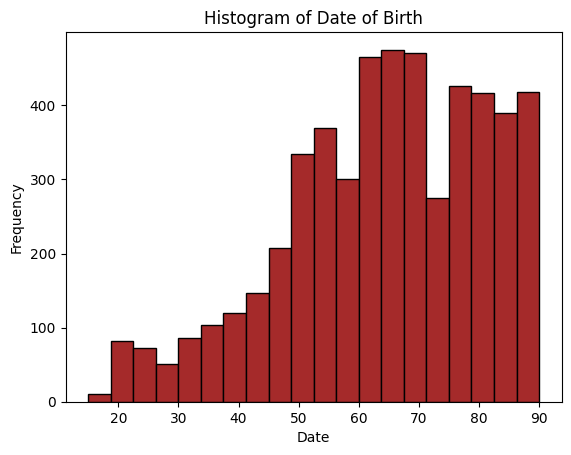

In [304]:
# Plotting the age distribution in the data
plt.hist(df_test['age'], bins=20, color='brown', edgecolor='black') 
plt.title('Histogram of Date of Birth')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

We can see from the histogram that the distribution is left skewed, probably because older people are more likely to end up in the hospital and consequently to incur in deathly conditions. This is an interesting carachteristic of the data.

### Marital Status

For the marital status column there were some missing value that were filled with one of the used parameters in the column which is the value 'UNKNOWN'. They will later on be processed with one hot encoding due to their low cardinality.

In [305]:
df_train['MARITAL_STATUS'].unique()

array(['SINGLE', 'MARRIED', 'SEPARATED', 'WIDOWED', 'DIVORCED', nan,
       'UNKNOWN (DEFAULT)', 'LIFE PARTNER'], dtype=object)

In [306]:
df_train['MARITAL_STATUS'] = df_train['MARITAL_STATUS'].fillna('UNKNOWN (DEFAULT)')
df_test['MARITAL_STATUS'] = df_test['MARITAL_STATUS'].fillna('UNKNOWN (DEFAULT)')

### Outliers

In [307]:
def columns_with_outliers(df, threshold=3):
    """
    Identify columns with outliers using Z-score method.

    Parameters:
    - df: DataFrame
        The input DataFrame with numerical columns.
    - threshold: float, optional
        The Z-score threshold for detecting outliers. Default is 3.

    Returns:
    - columns_with_outliers: list
        List of column names with outlier counts exceeding the threshold.
    """
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Compute Z-scores
    z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())

    # Identify columns with outlier counts exceeding the threshold
    columns_with_outliers = z_scores.apply(lambda x: (x > threshold).any()).index.tolist()

    return columns_with_outliers


Outliers were checked for best purpose. After Cross validating results they were found to be important predictors, so are being kept in the dataset. 

In [308]:
# Computing Outliers
outliers_columns_train = columns_with_outliers(df_train)
outliers_columns_test = columns_with_outliers(df_test)

# Display columns with outliers
print("Columns with Outliers in Training Set:")
print(outliers_columns_train)

print("\nColumns with Outliers in Test Set:")
print(outliers_columns_test)

Columns with Outliers in Training Set:
['HOSPITAL_EXPIRE_FLAG', 'subject_id', 'hadm_id', 'icustay_id', 'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'LOS', 'age']

Columns with Outliers in Test Set:
['subject_id', 'hadm_id', 'icustay_id', 'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'age']


## One Hot Encoding categoricals

The categorical caridanilty was checked and the ones that had a low one were selected and one hot encoding was performed.

In [309]:
# Identify categorical columns
categorical_columns = df_train.select_dtypes(include='object').columns.tolist()
print(categorical_columns)

['GENDER', 'ADMITTIME', 'ADMISSION_TYPE', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'ICD9_diagnosis', 'FIRST_CAREUNIT']


In [310]:
# Identify categorical columns
categorical_columns = ['GENDER', 'ADMISSION_TYPE', 'INSURANCE', 'MARITAL_STATUS', 'FIRST_CAREUNIT']

# categorical_columns = []
df_train = pd.get_dummies(df_train, columns = categorical_columns)
df_test = pd.get_dummies(df_test, columns = categorical_columns)

# Print columns that were dropped
print("Categorical columns turned into dummy variables:", categorical_columns)

# Display the updated DataFrame
display(df_train)


Categorical columns turned into dummy variables: ['GENDER', 'ADMISSION_TYPE', 'INSURANCE', 'MARITAL_STATUS', 'FIRST_CAREUNIT']


,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,ADMITTIME,RELIGION,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,LOS,age,GENDER_F,GENDER_M,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_URGENT,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,FIRST_CAREUNIT_CCU,FIRST_CAREUNIT_CSRU,FIRST_CAREUNIT_MICU,FIRST_CAREUNIT_SICU,FIRST_CAREUNIT_TSICU
0,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,99.0,95.739130,111.0,230.0,160.777778,2008-06-15,PROTESTANT QUAKER,WHITE,GASTROINTESTINAL BLEED,5789,4.5761,69,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False
1,0,76908,126136,221004,63.0,110.0,79.117647,89.0,121.0,106.733333,49.0,74.0,64.733333,58.0,84.0,74.800000,13.0,21.0,16.058824,36.333333,36.611111,36.472222,98.0,100.0,99.058824,103.0,103.0,103.000000,2010-12-27,UNOBTAINABLE,WHITE,ESOPHAGEAL FOOD IMPACTION,53013,0.7582,42,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
2,0,95798,136645,296315,81.0,98.0,91.689655,88.0,138.0,112.785714,45.0,67.0,56.821429,64.0,88.0,72.888889,13.0,21.0,15.900000,36.444444,36.888889,36.666667,100.0,100.0,100.000000,132.0,346.0,217.636364,2010-11-10,PROTESTANT QUAKER,BLACK/AFRICAN AMERICAN,UPPER GI BLEED,56983,3.7626,68,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,0,40708,102505,245557,76.0,128.0,98.857143,84.0,135.0,106.972973,30.0,89.0,41.864865,48.0,94.0,62.783784,12.0,35.0,26.771429,36.333333,39.500000,37.833333,78.0,100.0,95.085714,108.0,139.0,125.000000,2011-09-26,NOT SPECIFIED,WHITE,HIATAL HERNIA/SDA,5533,3.8734,74,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000,2008-09-12,JEWISH,WHITE,ABDOMINAL PAIN,56211,5.8654,79,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20880,0,28043,135417,244530,65.0,92.0,78.500000,60.0,160.0,110.976190,34.0,94.0,56.595238,41.0,102.0,69.285714,10.0,23.0,15.420000,35.555556,36.611111,36.155556,97.0,100.0,99.833333,68.0,139.0,103.571429,2010-03-25,CATHOLIC,WHITE,ALTERED MENTAL STATUS,3229,11.6116,87,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False
20881,0,87605,191007,216116,74.0,112.0,89.156250,100.0,150.0,123.272727,58.0,83.0,67.818182,74.0,99.0,82.363636,9.0,24.0,14.781250,37.055556,37.777778,37.476190,95.0,100.0,97.531250,184.0,377.0,245.400000,2011-03-15,NOT SPECIFIED,BLACK/HAITIAN,NEW BRAIN MASS,1918,1.1593,65,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
20882,0,47492,152608,274507,58.0,97.0,76.933333,94.0,131.0,112.037037,55.0,83.0,67.370370,66.0,95.0,78.500000,14.0,27.0,18.166667,36.055556,37.277778,37.007937,97.0,100.0,99.200000,51.0,460.0,190.0000

### Encoding Ethnicity

Ethnicity had a very high cardinality, so it could have been considered for dropping. However, exploring the unique values, some patterns were found to enable a dimensionality reduction to just 6 possibilities.

In [311]:
df_train['ETHNICITY'].unique()

array(['WHITE', 'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN',
       'UNKNOWN/NOT SPECIFIED', 'PATIENT DECLINED TO ANSWER',
       'ASIAN - ASIAN INDIAN', 'OTHER', 'HISPANIC/LATINO - PUERTO RICAN',
       'ASIAN', 'HISPANIC OR LATINO', 'UNABLE TO OBTAIN', 'BLACK/HAITIAN',
       'WHITE - OTHER EUROPEAN',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'WHITE - RUSSIAN',
       'WHITE - EASTERN EUROPEAN', 'ASIAN - CHINESE',
       'HISPANIC/LATINO - CUBAN', 'ASIAN - VIETNAMESE',
       'MULTI RACE ETHNICITY', 'AMERICAN INDIAN/ALASKA NATIVE',
       'MIDDLE EASTERN', 'ASIAN - KOREAN', 'CARIBBEAN ISLAND',
       'PORTUGUESE', 'HISPANIC/LATINO - SALVADORAN', 'ASIAN - FILIPINO',
       'HISPANIC/LATINO - GUATEMALAN', 'ASIAN - CAMBODIAN',
       'HISPANIC/LATINO - DOMINICAN', 'WHITE - BRAZILIAN',
       'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)',
       'HISPANIC/LATINO - HONDURAN', 'HISPANIC/LATINO - MEXICAN',
       'BLACK/AFRICAN', 'ASIAN - JAPANESE', 'HISPANIC/LATINO - COLOMBIAN'

In [312]:
def encode_ethnicity(ethnicity, ethn_type):
  if pd.isna(ethnicity):
    return np.nan  # Handle missing values appropriately
  else:
    return 1 if ethn_type in ethnicity.upper() else 0
  
# Manually encoding the rest
ethnic_replacements = {
    'UNKNOWN': ['UNABLE TO OBTAIN', 'UNKNOWN/NOT SPECIFIED', 'PATIENT DECLINED TO ANSWER'],
    'OTHER': ['AMERICAN INDIAN/ALASKA NATIVE', 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE',
              'CARIBBEAN ISLAND', 'MIDDLE EASTERN', 'OTHER', 'PORTUGUESE',
              'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'MULTI RACE ethnicity', 'SOUTH AMERICAN']
}
ethnicities = ["WHITE", "ASIAN", "BLACK", "LATINO", "UNKNOWN", "OTHER"]

for eth, values in ethnic_replacements.items():
    column_name = f'ethn_{eth}'
    df_train[column_name] = df_train['ETHNICITY'].replace(values, eth)
    df_test[column_name] = df_test['ETHNICITY'].replace(values, eth)
    
for ethn in ethnicities:
    column_name = f'ethn_{ethn}'
    df_train[column_name] = df_train['ETHNICITY'].apply(lambda x: encode_ethnicity(x, ethn))
    df_test[column_name] = df_test['ETHNICITY'].apply(lambda x: encode_ethnicity(x, ethn))



The other remaining categoricals were dropped.

In [313]:
# Drop categoricals to exclude
drop_cols = ['RELIGION', 'DIAGNOSIS']
df_train.drop(drop_cols, axis=1, inplace=True)

## Feature Engineering

### Creating Differentials for numerical variables with max and min values

Some variables had minimum and maximum values, so to reduce dimensionality and avoid multicollinearity the range between max and min was computed and the differentials were stored as new variables.

In [314]:
# Replace min and max with range
features = ['DiasBP', 'Glucose', 'HeartRate', 'MeanBP', 'RespRate', 'SpO2', 'SysBP', 'TempC']

# Iterate through each feature and calculate the differences
for feature in features:
    min_col = f"{feature}_Min"
    max_col = f"{feature}_Max"
    diff_col = f"{feature}_Differential"
    
    # Calculate the difference and create a new column
    df_train[diff_col] = df_train[max_col] - df_train[min_col]
    df_test[diff_col] = df_test[max_col] - df_test[min_col]

    # Drop the original min and max columns
    df_train.drop(columns=[min_col, max_col], inplace=True)
    df_test.drop(columns=[min_col, max_col], inplace=True)

In [315]:
df_train

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,ADMITTIME,ETHNICITY,ICD9_diagnosis,LOS,age,GENDER_F,GENDER_M,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_URGENT,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,FIRST_CAREUNIT_CCU,FIRST_CAREUNIT_CSRU,FIRST_CAREUNIT_MICU,FIRST_CAREUNIT_SICU,FIRST_CAREUNIT_TSICU,ethn_UNKNOWN,ethn_OTHER,ethn_WHITE,ethn_ASIAN,ethn_BLACK,ethn_LATINO,DiasBP_Differential,Glucose_Differential,HeartRate_Differential,MeanBP_Differential,RespRate_Differential,SpO2_Differential,SysBP_Differential,TempC_Differential
0,0,55440,195768,228357,121.043478,106.586957,61.173913,74.543478,22.347826,36.080247,95.739130,160.777778,2008-06-15,WHITE,5789,4.5761,69,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,0,0,1,0,0,0,48.0,119.0,56.0,35.0,15.0,9.0,53.0,1.833333
1,0,76908,126136,221004,79.117647,106.733333,64.733333,74.800000,16.058824,36.472222,99.058824,103.000000,2010-12-27,WHITE,53013,0.7582,42,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,0,0,1,0,0,0,25.0,0.0,47.0,26.0,8.0,2.0,32.0,0.277778
2,0,95798,136645,296315,91.689655,112.785714,56.821429,72.888889,15.900000,36.666667,100.000000,217.636364,2010-11-10,BLACK/AFRICAN AMERICAN,56983,3.7626,68,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,0,0,0,0,1,0,22.0,214.0,17.0,24.0,8.0,0.0,50.0,0.444444
3,0,40708,102505,245557,98.857143,106.972973,41.864865,62.783784,26.771429,37.833333,95.085714,125.000000,2011-09-26,WHITE,5533,3.8734,74,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,0,0,1,0,0,0,59.0,31.0,52.0,46.0,23.0,22.0,51.0,3.166667
4,0,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,2008-09-12,WHITE,56211,5.8654,79,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,0,0,1,0,0,0,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20880,0,28043,135417,244530,78.500000,110.976190,56.595238,69.285714,15.420000,36.155556,99.833333,103.571429,2010-03-25,WHITE,3229,11.6116,87,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,0,0,1,0,0,0,60.0,71.0,27.0,61.0,13.0,3.0,100.0,1.055556
20881,0,87605,191007,216116,89.156250,123.272727,67.818182,82.363636,14.781250,37.476190,97.531250,245.400000,2011-03-15,BLACK/HAITIAN,1918,1.1593,65,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,0,0,0,0,1,0,25.0,193.0,38.0,25.0,15.0,5.0,50.0,0.722222
20882,0,47492,152608,274507,76.933333,112.037037,67.370370,78.500000,18.166667,37.007937,99.200000,190.000000,2009-09-29,BLACK/AFRICAN AMERICAN,24980,1.8830,62,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,0,0,0,0,1,0,28.0,409.0,39.0,29.0,13.0,3.0,37.0,1.222222
20883,0,62946,191485,225930,81.844444,123.837209,60.232558,75.883721,19.044444,36.635417,96.311111,91.000000,2009-06-11,WHITE,41401,3.1981,90,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,0,0,1,0,0,0,38.0,0.0,43.0,27.0,12.0,9.0,54.0,1.888889


### Creating Number of visits per patient Column

Some patients were found to be admitted several times, so it could be inferred they were particularly ill. This was considered as a factor that was possibly confounding the results, so it was worth exploring further and accounting for it in the model.

In [316]:
# Checking the number of admissions per subject
admission_count = df_train['subject_id'].value_counts()
admission_count = admission_count.sort_values(ascending=False)
ill_subjects = []
for i in range (len(admission_count)):
    if admission_count.values[i] > 10:
        ill_subjects.append(admission_count.keys()[i])

print(f'The subjects that were particularly ill, so admitted several times are:\n\n{ill_subjects}')


The subjects that were particularly ill, so admitted several times are:

[109, 73713, 23657, 5060, 29035, 11861, 76327, 31260, 5727, 3952, 7809]


A variable with the number of visits per patient was created to account for this factor in the model.

In [317]:
df_train["number_of_visits"] = df_train.sort_values(['subject_id', 'ADMITTIME']).groupby(["subject_id"]).cumcount() + 1
df_test["number_of_visits"] = df_test.sort_values(['subject_id', 'ADMITTIME']).groupby(["subject_id"]).cumcount() + 1

### Creating Number of Concurrent Diseases Column in diagnoses dataset

From the dataset it appeared that patients had concurrent diseases when admitted to the hospital that can be used for prediction.

In [318]:
# Computing the number of comorbidities in each of the ICU stays
number_of_diseases = df_diagnoses.groupby(["subject_id", "hadm_id"]).max()["SEQ_NUM"].reset_index()
number_of_diseases = number_of_diseases.rename({"SEQ_NUM": "number_of_diseases"}, axis=1)
# Merge df_train with number_of_diseases on 'subject_id' and 'hadm_id'
df_train = df_train.merge(number_of_diseases, on=['subject_id', 'hadm_id'], how='left')
df_test = df_test.merge(number_of_diseases, on=['subject_id', 'hadm_id'], how='left')

## Target Encoding ICD9 diagnosis 

ICD9 codes indicate the code associated with the doagnosis, so are a very important feature to predict mortality. Therefore, target encoding will be conducted to improve the prediction score.  

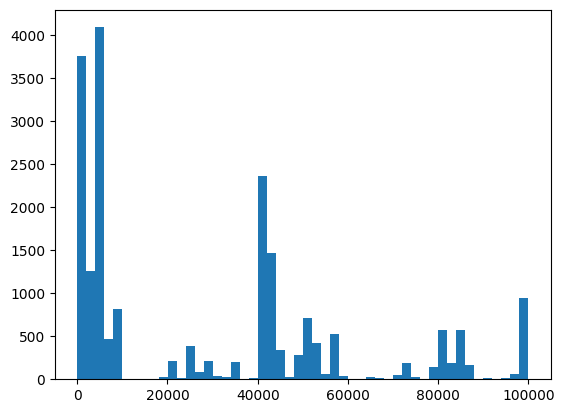

In [319]:
df_trial = df_train[~df_train['ICD9_diagnosis'].str.contains('V')]
plt.hist(pd.to_numeric(df_trial['ICD9_diagnosis']), bins=50)
plt.show()

The diagnoses extra dataset was used to encode the diagnosis and later on to create extra features for prediction for each of the patients.

In [320]:
df_diagnoses

,subject_id,hadm_id,SEQ_NUM,ICD9_diagnosis
0,256,108811,1.0,53240
1,256,108811,2.0,41071
2,256,108811,3.0,53560
3,256,108811,4.0,40390
4,256,108811,5.0,5859
...,...,...,...,...
651042,65535,178280,5.0,5119
651043,65535,178280,6.0,5990
651044,65535,178280,7.0,0414
651045,65535,178280,8.0,25000


The datasets were merged limiting to 10 the number of concurrent diseases being considered for each patient. Then the concurrent diseases will be target encoding based on the average mortality associated with that disease. Finally, an average mortality index will be computed from the average of these values.

In [321]:
df_diagnoses = df_diagnoses[df_diagnoses['SEQ_NUM'].between(2, 10)]
df_diagnoses = df_diagnoses.pivot(index=['subject_id', 'hadm_id'], columns= 'SEQ_NUM', values='ICD9_diagnosis')
df_diagnoses = df_diagnoses.reset_index()
df_diagnoses.columns = ['subject_id'] + ['hadm_id'] + [f'ICD9_{int(col)}' for col in df_diagnoses.columns[2:]]
df_train = df_train.merge(df_diagnoses, on=['subject_id', 'hadm_id'], how='left')
df_test = df_test.merge(df_diagnoses, on=['subject_id', 'hadm_id'], how='left')
df_train.rename(columns={'ICD9_diagnosis': 'ICD9_1.0'}, inplace=True)
df_test.rename(columns={'ICD9_diagnosis': 'ICD9_1.0'}, inplace=True)

In [322]:
diagnoses_cols = ['ICD9_1.0','ICD9_2', 'ICD9_3', 'ICD9_4', 'ICD9_5', 'ICD9_6', 'ICD9_7', 'ICD9_8', 'ICD9_9', 'ICD9_10']
y_train = df_train[['HOSPITAL_EXPIRE_FLAG']]

In [323]:
# Target Encoding for diagnoses

# Initialize TargetEncoder
encoder = ce.TargetEncoder()

# Fit on df_train and y_train
encoder.fit(df_train[diagnoses_cols], y_train)

# Transform df_train and df_test and calculate means
df_train_encoded = encoder.transform(df_train[diagnoses_cols]).mean(axis=1)
df_test_encoded = encoder.transform(df_test[diagnoses_cols]).mean(axis=1)

# Concatenate the encoded means with the original df_train and df_test
df_train = pd.concat([df_train, df_train_encoded.rename('average_mortality')], axis=1)
df_test = pd.concat([df_test, df_test_encoded.rename('average_mortality')], axis=1)

# Drop columns
df_train.drop(diagnoses_cols, axis=1, inplace = True)
df_test.drop(diagnoses_cols, axis=1, inplace = True)

## Creating X_train dataframe

Based on the created columns and on the available columns the X_train dataset is computed and later on based on their importance they will be selected.

In [231]:
df_train.columns

Index(['HOSPITAL_EXPIRE_FLAG', 'subject_id', 'hadm_id', 'icustay_id',
       'HeartRate_Mean', 'SysBP_Mean', 'DiasBP_Mean', 'MeanBP_Mean',
       'RespRate_Mean', 'TempC_Mean', 'SpO2_Mean', 'Glucose_Mean', 'ADMITTIME',
       'ETHNICITY', 'age', 'GENDER_F', 'GENDER_M', 'ADMISSION_TYPE_ELECTIVE',
       'ADMISSION_TYPE_EMERGENCY', 'ADMISSION_TYPE_URGENT',
       'INSURANCE_Government', 'INSURANCE_Medicaid', 'INSURANCE_Medicare',
       'INSURANCE_Private', 'INSURANCE_Self Pay', 'MARITAL_STATUS_DIVORCED',
       'MARITAL_STATUS_LIFE PARTNER', 'MARITAL_STATUS_MARRIED',
       'MARITAL_STATUS_SEPARATED', 'MARITAL_STATUS_SINGLE',
       'MARITAL_STATUS_UNKNOWN (DEFAULT)', 'MARITAL_STATUS_WIDOWED',
       'FIRST_CAREUNIT_CCU', 'FIRST_CAREUNIT_CSRU', 'FIRST_CAREUNIT_MICU',
       'FIRST_CAREUNIT_SICU', 'FIRST_CAREUNIT_TSICU', 'ethn_UNKNOWN',
       'ethn_OTHER', 'ethn_WHITE', 'ethn_ASIAN', 'ethn_BLACK', 'ethn_LATINO',
       'DiasBP_Differential', 'Glucose_Differential', 'HeartRate_Differenti

In [324]:
# Selecting columns that will be included in the model
target = ['LOS']
features = ['HeartRate_Mean', 'SysBP_Mean', 'DiasBP_Mean', 'MeanBP_Mean',
       'RespRate_Mean', 'TempC_Mean', 'SpO2_Mean', 'Glucose_Mean',
       'age', 'GENDER_F', 'GENDER_M', 'ADMISSION_TYPE_ELECTIVE',
       'ADMISSION_TYPE_EMERGENCY', 'ADMISSION_TYPE_URGENT',
       'INSURANCE_Government', 'INSURANCE_Medicaid', 'INSURANCE_Medicare',
       'INSURANCE_Private', 'INSURANCE_Self Pay', 'MARITAL_STATUS_DIVORCED',
       'MARITAL_STATUS_LIFE PARTNER', 'MARITAL_STATUS_MARRIED',
       'MARITAL_STATUS_SEPARATED', 'MARITAL_STATUS_SINGLE',
       'MARITAL_STATUS_UNKNOWN (DEFAULT)', 'MARITAL_STATUS_WIDOWED',
       'FIRST_CAREUNIT_CCU', 'FIRST_CAREUNIT_CSRU', 'FIRST_CAREUNIT_MICU',
       'FIRST_CAREUNIT_SICU', 'FIRST_CAREUNIT_TSICU', 'ethn_UNKNOWN',
       'ethn_OTHER', 'ethn_WHITE', 'ethn_ASIAN', 'ethn_BLACK', 'ethn_LATINO',
       'DiasBP_Differential', 'Glucose_Differential', 'HeartRate_Differential',
       'MeanBP_Differential', 'RespRate_Differential', 'SpO2_Differential',
       'SysBP_Differential', 'TempC_Differential', 'number_of_visits',
       'number_of_diseases', 'average_mortality']
 
X_train = df_train[features]
X_test = df_test[features]

y_train = df_train[target]

## Standardizing

The variables will be standardized fitting on the train dataset values and then transformed for the test and the train data.

In [325]:
cols = X_train.columns

# Standardizing using StandardScaler
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=cols)
X_test = pd.DataFrame(X_test_scaled, columns=cols)

## Missing data imputations

The data has several missing data. They will first be checked and then two different imputation strategies will be considered to fill them. Backward fill was also considered as a possible strategy as patients had several visits at the hospital. However, this didn't improve the prediction, so it was not considered as an acceptable strategy.

Missing values per column:

HeartRate_Mean                      10.47
SysBP_Mean                          10.57
DiasBP_Mean                         10.58
MeanBP_Mean                         10.47
RespRate_Mean                       10.48
TempC_Mean                          11.96
SpO2_Mean                           10.55
Glucose_Mean                         1.21
age                                  0.00
GENDER_F                             0.00
GENDER_M                             0.00
ADMISSION_TYPE_ELECTIVE              0.00
ADMISSION_TYPE_EMERGENCY             0.00
ADMISSION_TYPE_URGENT                0.00
INSURANCE_Government                 0.00
INSURANCE_Medicaid                   0.00
INSURANCE_Medicare                   0.00
INSURANCE_Private                    0.00
INSURANCE_Self Pay                   0.00
MARITAL_STATUS_DIVORCED              0.00
MARITAL_STATUS_LIFE PARTNER          0.00
MARITAL_STATUS_MARRIED               0.00
MARITAL_STATUS_SEPARATED             0.00
MARITA

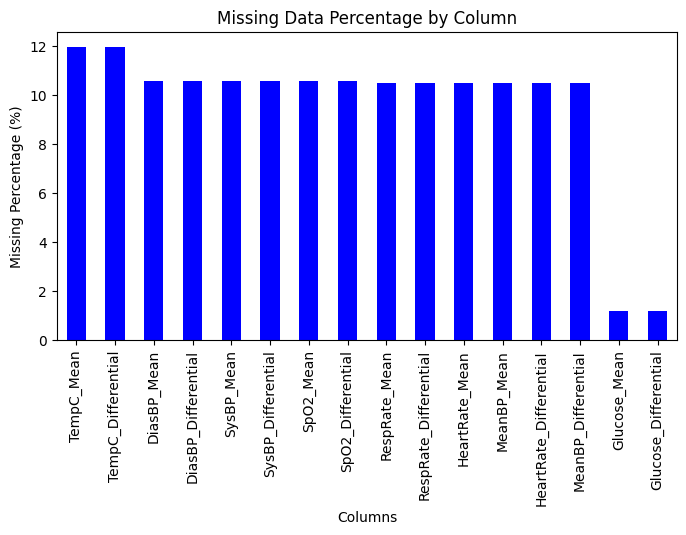

In [326]:
# Checking missing values by column

# Calculate missing percentages
missing_percentages = (X_train.isnull().mean() * 100).round(2)

# Check if there are any missing values
if missing_percentages.empty:
    print("No missing values in the DataFrame.")
else:
    # Print missing values per column
    print("Missing values per column:\n")
    print(missing_percentages)

    # Filter columns with missing values
    missing_columns = missing_percentages[missing_percentages > 0]

    # Check if there are any columns with missing values
    if not missing_columns.empty:
        # Sort columns by missing percentage in descending order
        missing_columns = missing_columns.sort_values(ascending=False)

        # Plot missing percentages
        plt.figure(figsize=(8, 4))
        missing_columns.plot.bar(color='blue')
        plt.title('Missing Data Percentage by Column')
        plt.xlabel('Columns')
        plt.ylabel('Missing Percentage (%)')
        plt.show()
    else:
        print("\nNo columns have missing values.")


#### Drop columns with high missing percentage

For robustness, columns with a very high missing percentage will be dropped from the dataframe. A treshold is set at 70% of missing data and in this case there are no columns that have such missing percentage. It was still included in the notebook for completeness and reproducibility.

In [327]:
# Set a threshold for missing percentage
threshold = 70

# Filter columns to drop based on missing percentage
columns_to_drop = missing_columns[missing_columns > threshold].index

# Drop columns with missing percentage higher than 75
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Print the columns that were dropped
print("Columns dropped due to high missing percentage:\n", columns_to_drop)

# Display the updated DataFrame
display(X_train)

Columns dropped due to high missing percentage:
 Index([], dtype='object')


,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,age,GENDER_F,GENDER_M,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_URGENT,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,FIRST_CAREUNIT_CCU,FIRST_CAREUNIT_CSRU,FIRST_CAREUNIT_MICU,FIRST_CAREUNIT_SICU,FIRST_CAREUNIT_TSICU,ethn_UNKNOWN,ethn_OTHER,ethn_WHITE,ethn_ASIAN,ethn_BLACK,ethn_LATINO,DiasBP_Differential,Glucose_Differential,HeartRate_Differential,MeanBP_Differential,RespRate_Differential,SpO2_Differential,SysBP_Differential,TempC_Differential,number_of_visits,number_of_diseases,average_mortality
0,2.341278,-0.751956,-0.121493,-0.275898,0.873328,-1.112702,-0.483297,0.487878,0.305132,1.135128,-1.135128,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,-0.928031,-0.107820,1.591804,-0.202797,-0.395018,-0.369760,-0.41963,1.190481,-0.483783,-0.380803,-0.167203,-0.165226,0.601965,-0.16369,-0.343222,-0.206228,0.197571,0.479910,1.133254,-0.523170,-0.139654,0.061696,-0.271633,0.525072,-0.353591,0.296104,0.372903
1,-0.395788,-0.743192,0.201782,-0.252815,-0.760345,-0.463154,0.939604,-0.798014,-1.267392,1.135128,-1.135128,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,-1.130611,1.531103,-0.09683,-0.269380,-0.0259,1.077550,-0.107820,-0.628218,-0.202797,-0.395018,-0.369760,-0.41963,1.190481,-0.483783,-0.380803,-0.167203,-0.165226,0.601965,-0.16369,-0.343222,-0.206228,-0.947893,-0.828365,0.634904,-0.821532,-1.275039,-0.894603,-1.133914,-1.267054,-0.353591,-1.621412,-0.950180
2,0.424957,-0.380797,-0.516797,-0.424786,-0.801602,-0.140938,1.343015,1.753313,0.246890,1.135128,-1.135128,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,-0.928031,9.274742,-0.628218,-0.202797,-0.395018,-0.369760,-0.41963,1.190481,-0.483783,-0.380803,-0.167203,-0.165226,-1.661227,-0.16369,2.913566,-0.206228,-1.097301,1.524332,-1.026263,-0.887835,-1.275039,-1.167831,-0.394816,-1.075041,-0.353591,-0.114793,0.818512
3,0.892876,-0.728843,-1.875188,-1.334091,2.022432,1.792360,-0.763367,-0.308386,0.596340,1.135128,-1.135128,2.516588,-2.409848,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,-0.928031,-0.107820,-0.628218,-0.202797,2.531532,-0.369760,-0.41963,-0.839997,2.067041,-0.380803,-0.167203,-0.165226,0.601965,-0.16369,-0.343222,-0.206228,0.745402,-0.487554,0.911765,-0.158504,1.157928,1.837681,-0.353755,2.061180,-0.353591,0.022173,-0.852075
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.575456,0.887548,1.135128,-1.135128,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,-0.928031,-0.107820,-0.628218,-0.202797,2.531532,-0.369760,-0.41963,-0.839997,-0.483783,2.626029,-0.167203,-0.165226,0.601965,-0.16369,-0.343222,-0.206228,NaN,-0.388609,NaN,NaN,NaN,NaN,NaN,NaN,0.540338,0.159138,-0.245174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20880,-0.436110,-0.489145,-0.537340,-0.749016,-0.926290,-0.987907,1.271577,-0.785297,1.353481,-0.880958,0.880958,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,1.077550,-0.107820,-0.628218,-0.202797,-0.395018,-0.369760,-0.41963,1.190481,-0.483783,-0.380803,-0.167203,-0.165226,0.601965,-0.16369,-0.343222,-0.206228,0.795204,-0.047797,-0.472541,0.338767,-0.464050,-0.757989,1.658234,-0.370991,1.434266,2.076654,0.568692
20881,0.259567,0.247128,0.481955,0.427796,-1.092216,1.200534,0.284849,2.371215,0.072166,-0.880958,0.880958,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,-1.130611,1.531103,-0.09683,-0.269380,-0.0259,1.077550,-0.107820,-0.628218,-0.202797,-0.395018,-0.369760,-0.41963

### Imputing missing values

As aforementioned, two strategies were considered for the imputations of the missing values: KNN imputing and a simple imputer using the column means. All the numerical variables were imputed excluding the target variable obviously.

With Means

In [328]:

cont_imputer = SimpleImputer(strategy="mean")
# Standardization and KNN imputing
def imputing_missing(X_train, X_test, vars_to_impute):
    vars_to_exclude = [target_variable]
    vars_to_impute = [var for var in vars_to_impute if var not in vars_to_exclude]
    imputer = SimpleImputer(strategy="mean")    
    imputer.fit(X_train[vars_to_impute])
    X_train[vars_to_impute] = imputer.transform(X_train[vars_to_impute])
    X_test[vars_to_impute] = imputer.transform(X_test[vars_to_impute])
    return X_train, X_test

target_variable = 'HOSPITAL_EXPIRE_FLAG'
vars_to_impute = X_train.select_dtypes(include='number').columns
if len(vars_to_impute)>0:
    X_train, X_test = imputing_missing(X_train, X_test, vars_to_impute)

With KNNImputer

In [329]:
# # Standardization and KNN imputing
# def imputing_missing(X_train, X_test, vars_to_impute):
#     vars_to_exclude = [target_variable]
#     vars_to_impute = [var for var in vars_to_impute if var not in vars_to_exclude]
#     standardizer = StandardScaler()
#     standardizer.fit(X_train[vars_to_impute])
#     X_train[vars_to_impute] = standardizer.transform(X_train[vars_to_impute])
#     X_test[vars_to_impute] = standardizer.transform(X_test[vars_to_impute])
#     imputer = KNNImputer(n_neighbors=5)
#     imputer.fit(X_train[vars_to_impute])
#     X_train[vars_to_impute] = imputer.transform(X_train[vars_to_impute])
#     X_test[vars_to_impute] = imputer.transform(X_test[vars_to_impute])
#     X_train[vars_to_impute] = standardizer.inverse_transform(X_train[vars_to_impute])
#     X_test[vars_to_impute] = standardizer.inverse_transform(X_test[vars_to_impute])
#     return X_train, X_test

# target_variable = 'HOSPITAL_EXPIRE_FLAG'
# vars_to_impute = X_train.select_dtypes(include='number').columns
# if len(vars_to_impute)>0:
#     X_train, X_test = imputing_missing(X_train, X_test, vars_to_impute)

## Class imbalance

Being death of patients the target variable there is a high probability of having a highly imbalanced dataset with the positive class as the minority class

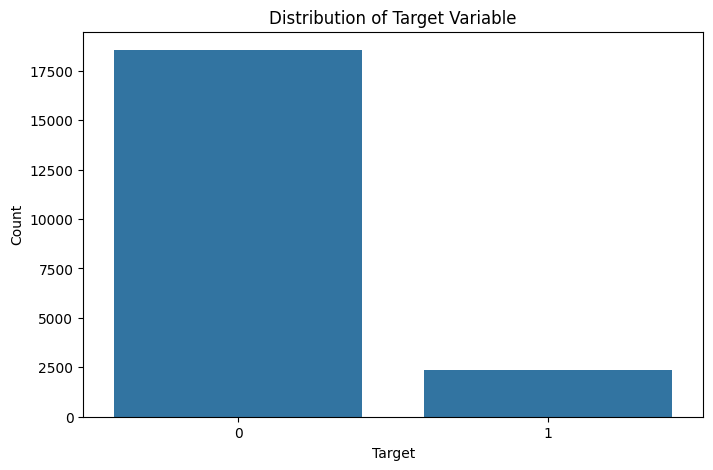

Imbalance Ratio (0/1): 7.906183368869936
The dataset is imbalanced. Consider oversampling or undersampling.


In [330]:
# Assuming 'target_column' is the name of your target variable
target_column = 'HOSPITAL_EXPIRE_FLAG'

# Check the distribution of the target variable
target_distribution = df_train[target_column].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=target_column, data=df_train)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Check the imbalance ratio
imbalance_ratio = target_distribution[0] / target_distribution[1]

# Print the imbalance ratio
print("Imbalance Ratio (0/1):", imbalance_ratio)

# Determine if oversampling or undersampling is needed
if imbalance_ratio < 0.2 or imbalance_ratio > 5:
    print("The dataset is imbalanced. Consider oversampling or undersampling.")
else:
    print("The dataset is balanced.")

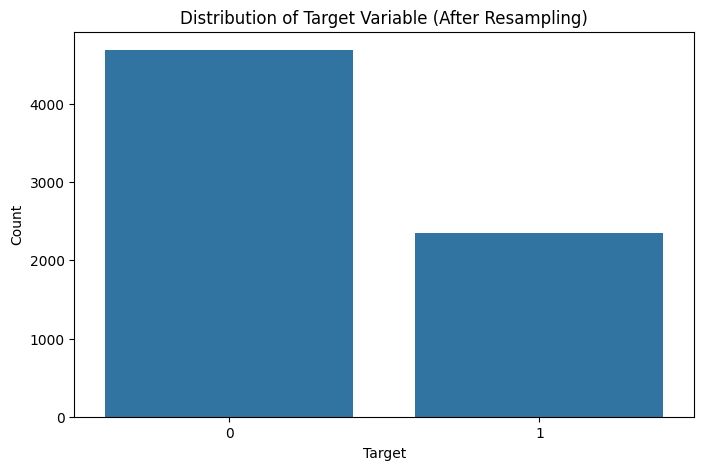

In [331]:
if imbalance_ratio < 0.2 or imbalance_ratio > 2:
    
    # Separate features and target variable
    X = df_train.drop(columns=[target_column])
    y = df_train[target_column]

    # Perform oversampling using RandomOverSampler
    if imbalance_ratio < 0.2:
        oversampler = RandomOverSampler(sampling_strategy=0.5)
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    # Perform undersampling using RandomUnderSampler
    elif imbalance_ratio > 5:
        undersampler = RandomUnderSampler(sampling_strategy=0.5)
        X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Recreate the DataFrame with resampled data
    df_train_resampled = pd.concat([X_resampled, y_resampled], axis=1)
    
    # Display the updated distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x=target_column, data=df_train_resampled)
    plt.title('Distribution of Target Variable (After Resampling)')
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.show()

else:
    print("The dataset is balanced.")

Oversampling helped to balance the dataset and slightly improved the cross validation score

## Correlation Matrix

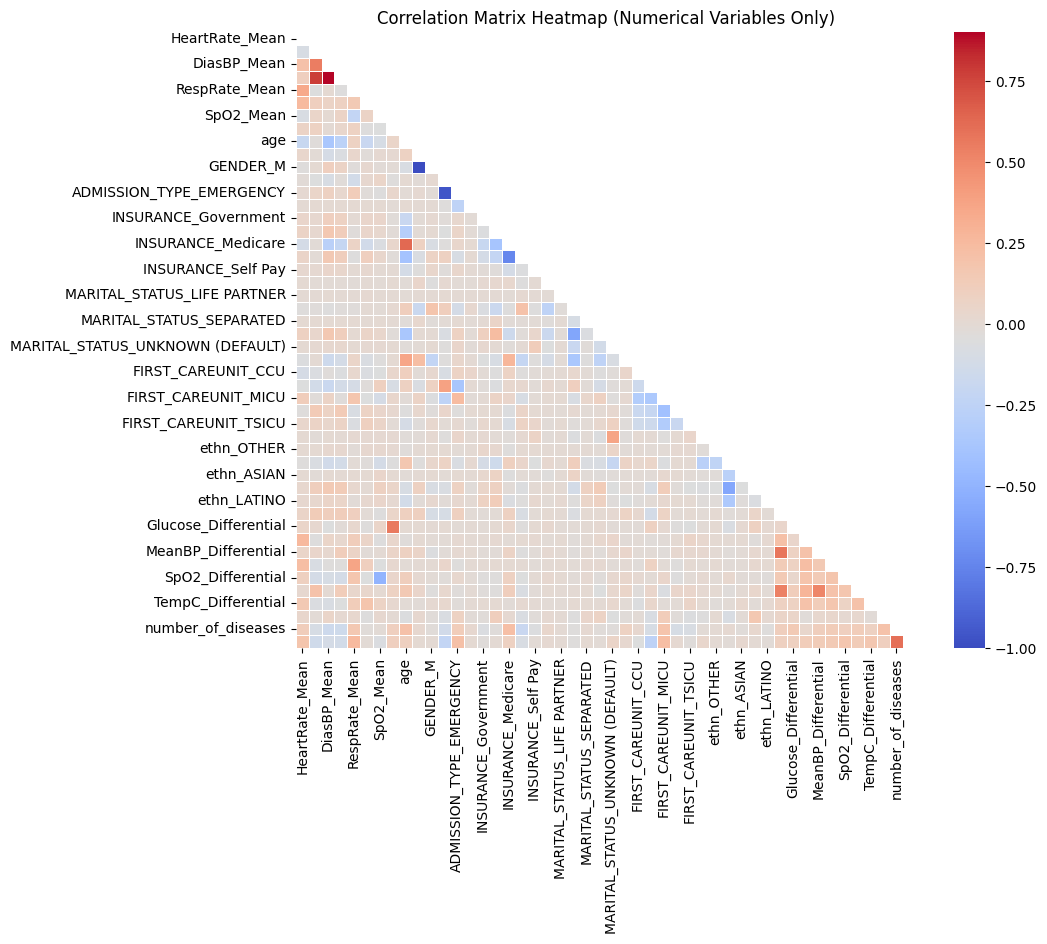

In [332]:
# List of numerical columns to exclude from the correlation matrix
exclude_columns = []

# Selecting numerical columns except those to be excluded
numerical_columns = [col for col in X_train.select_dtypes(include='number').columns if col not in exclude_columns]

# Creating a new dataframe with only the selected numerical columns
selected_X_train = X_train[numerical_columns]

# Correlation matrix for selected numerical columns
correlation_matrix = selected_X_train.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(correlation_matrix)

# Create a heatmap without showing numbers
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, mask=matrix)
plt.title("Correlation Matrix Heatmap (Numerical Variables Only)")
plt.show()


## Selecting best features

With this code the 20 best features for the model will be selected based on feature importance.

In [333]:
# # Initialize SelectKBest with ANOVA F-value, selecting the top 20 features
# select_k_best = SelectKBest(f_classif, k=20)

# # Fit and transform X_train_imputed_df to select the top 20 features
# X_train = select_k_best.fit_transform(X_train, y_train)

# # Transform X_test
# X_test = select_k_best.transform(X_test)

## Training Models

### Neural Network

In [334]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.neural_network import MLPClassifier

In [243]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Predicting Death

In [291]:
# from sklearn.model_selection import cross_val_score
# from sklearn.neural_network import MLPClassifier

# # Assuming X_train and y_train are your features and labels

# # Create an MLP classifier with your desired parameters
# MLP_loss = MLPClassifier(solver='adam', 
#                          learning_rate='adaptive',  # You can choose 'invscaling' or 'adaptive' if needed
#                          learning_rate_init=0.01,
#                          alpha=1e-2,
#                          early_stopping=True,
#                          hidden_layer_sizes=(10,20,10,), 
#                          random_state=1, 
#                          max_iter=200,)
# MLP_loss.fit(X_train, y_train)

# # Perform cross-validation
# cv_scores = cross_val_score(MLP_loss, X_train, y_train, cv=5)

# # Print the cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Score:", np.mean(cv_scores))

# loss_curve = MLP_loss.loss_curve_

# plt.plot(loss_curve, color = "blue")
# plt.xlabel("Iteration")
# plt.ylabel("Loss")

Cross-Validation Scores: [0.91716543 0.91644721 0.91668662 0.91692602 0.91381374]
Mean CV Score: 0.9162078046444817


### Predicting Length of stay

In [336]:
X_train

,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,age,GENDER_F,GENDER_M,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_URGENT,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_LIFE PARTNER,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SEPARATED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_WIDOWED,FIRST_CAREUNIT_CCU,FIRST_CAREUNIT_CSRU,FIRST_CAREUNIT_MICU,FIRST_CAREUNIT_SICU,FIRST_CAREUNIT_TSICU,ethn_UNKNOWN,ethn_OTHER,ethn_WHITE,ethn_ASIAN,ethn_BLACK,ethn_LATINO,DiasBP_Differential,Glucose_Differential,HeartRate_Differential,MeanBP_Differential,RespRate_Differential,SpO2_Differential,SysBP_Differential,TempC_Differential,number_of_visits,number_of_diseases,average_mortality
0,2.341278e+00,-7.519564e-01,-1.214933e-01,-2.758982e-01,8.733277e-01,-1.112702e+00,-4.832973e-01,0.487878,0.305132,1.135128,-1.135128,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,-0.928031,-0.107820,1.591804,-0.202797,-0.395018,-0.369760,-0.41963,1.190481,-0.483783,-0.380803,-0.167203,-0.165226,0.601965,-0.16369,-0.343222,-0.206228,1.975711e-01,0.479910,1.133254e+00,-5.231697e-01,-1.396544e-01,6.169649e-02,-2.716331e-01,5.250718e-01,-0.353591,0.296104,0.372903
1,-3.957881e-01,-7.431919e-01,2.017819e-01,-2.528151e-01,-7.603448e-01,-4.631544e-01,9.396037e-01,-0.798014,-1.267392,1.135128,-1.135128,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,-1.130611,1.531103,-0.09683,-0.269380,-0.0259,1.077550,-0.107820,-0.628218,-0.202797,-0.395018,-0.369760,-0.41963,1.190481,-0.483783,-0.380803,-0.167203,-0.165226,0.601965,-0.16369,-0.343222,-0.206228,-9.478926e-01,-0.828365,6.349038e-01,-8.215324e-01,-1.275039e+00,-8.946028e-01,-1.133914e+00,-1.267054e+00,-0.353591,-1.621412,-0.950180
2,4.249570e-01,-3.807968e-01,-5.167965e-01,-4.247859e-01,-8.016018e-01,-1.409381e-01,1.343015e+00,1.753313,0.246890,1.135128,-1.135128,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,-0.928031,9.274742,-0.628218,-0.202797,-0.395018,-0.369760,-0.41963,1.190481,-0.483783,-0.380803,-0.167203,-0.165226,-1.661227,-0.16369,2.913566,-0.206228,-1.097301e+00,1.524332,-1.026263e+00,-8.878352e-01,-1.275039e+00,-1.167831e+00,-3.948161e-01,-1.075041e+00,-0.353591,-0.114793,0.818512
3,8.928759e-01,-7.288431e-01,-1.875188e+00,-1.334091e+00,2.022432e+00,1.792360e+00,-7.633673e-01,-0.308386,0.596340,1.135128,-1.135128,2.516588,-2.409848,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,-0.928031,-0.107820,-0.628218,-0.202797,2.531532,-0.369760,-0.41963,-0.839997,2.067041,-0.380803,-0.167203,-0.165226,0.601965,-0.16369,-0.343222,-0.206228,7.454015e-01,-0.487554,9.117650e-01,-1.585041e-01,1.157928e+00,1.837681e+00,-3.537551e-01,2.061180e+00,-0.353591,0.022173,-0.852075
4,1.247098e-15,-1.445662e-16,-6.136782e-16,-7.330001e-16,-7.110748e-16,-1.176155e-14,-9.584454e-16,-0.575456,0.887548,1.135128,-1.135128,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,-0.928031,-0.107820,-0.628218,-0.202797,2.531532,-0.369760,-0.41963,-0.839997,-0.483783,2.626029,-0.167203,-0.165226,0.601965,-0.16369,-0.343222,-0.206228,1.647382e-16,-0.388609,-2.086255e-16,1.200767e-16,3.040405e-17,-1.148613e-16,1.057616e-16,4.356847e-17,0.540338,0.159138,-0.245174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20880,-4.361103e-01,-4.891446e-01,-5.373397e-01,-7.490164e-01,-9.262898e-01,-9.879066e-01,1.271577e+00,-0.785297,1.353481,-0.880958,0.880958,-0.397363,0.414964,-0.10318,-0.1736,-0.335855,0.884478,-0.653124,-0.09683,-0.269380,-0.0259,1.077550,-0.107820,-0.628218,-0.202797,-0.395018,-0.369760,-0.41963,1.190481,-0.483783,-0.380803,-0.167203,-0.165226,0.601965,-0.16369,-0.3

Cross-Validation Scores: [19.10982816 23.64394089 18.31567164 19.9422837  22.88467587]
Mean CV Score: 20.779280051950547


Text(0, 0.5, 'Loss')

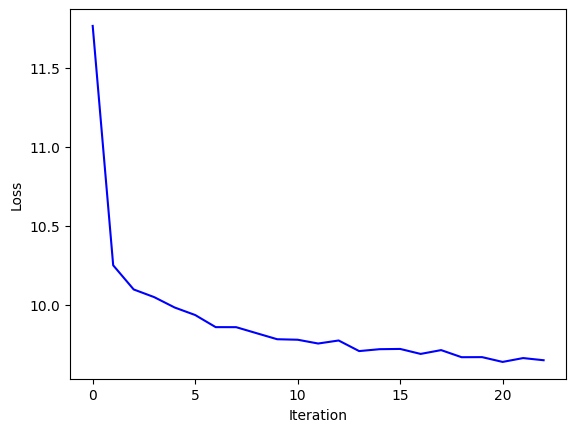

In [339]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

# Assuming X_train and y_train are your features and labels

# Create an MLP classifier with your desired parameters
MLP_loss = MLPRegressor(solver='adam', 
                         learning_rate='adaptive',  # You can choose 'invscaling' or 'adaptive' if needed
                         learning_rate_init=0.01,
                         alpha=1e-2,
                         early_stopping=True,
                         hidden_layer_sizes=(10,), 
                         random_state=1, 
                         max_iter=200,)
MLP_loss.fit(X_train, y_train)

# Perform cross-validation
cv_scores_mse = cross_val_score(MLP_loss, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-Validation Scores:", -cv_scores_mse)
print("Mean CV Score:", np.mean(-cv_scores_mse))

loss_curve = MLP_loss.loss_curve_

plt.plot(loss_curve, color = "blue")
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [ ]:
def build_model(optimizer = 'adam', init='glorot_uniform')
    Keras_MLP = Sequential([
        Dense(64, activation = 'relu', input_shape(shape,), kernel_initializer = init),
            kernel_regularize=regularizers.l1_l2(l1=1e-5, l2=1e-4),
            bias_regularizer=regularizers.l2(1e-4),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the model
model = KerasClassifier(build_fn=build_model)

print(model.get_params().keys())

In [ ]:
Keras_MLP.fit(
    X_train,
    to_categorical(train_labels),
    epochs = 3,
    batch_size = 32,
)

In [140]:
# Initialize KNeighborsClassifier
knn_model = KNeighborsClassifier(algorithm='brute')
list_of_numbers = list(range(1, 2001, 50))
grid_values = {'n_neighbors':list_of_numbers, 'weights':['uniform','distance'] }
grid_knn_acc = GridSearchCV(knn_model, param_grid = grid_values, scoring = 'roc_auc', cv=5)
grid_knn_acc.fit(X_train, y_train)

best_params = grid_knn_acc.best_params_
optimal_neighbors = best_params['n_neighbors']
optimal_weights = best_params['weights']
print('Optimal Number of Neighbors:', optimal_neighbors)
print('Optimal Weight:', optimal_weights)

print("Best score: %0.3f" % grid_knn_acc.best_score_)

Optimal Number of Neighbors: 101
Optimal Weight: distance
Best score: 0.917


After hyperparameter tuning the predictions on the test dataframe will be computed based on the fit model on the train data.

In [142]:
# Predict probabilities of class one for the test set
y_hat_test = grid_knn_acc.predict_proba(X_test)
y_hat_test = y_hat_test[:, 1]

# Produce .csv for kaggle testing
test_predictions_submit = pd.DataFrame({"icustay_id": df_test["icustay_id"], "HOSPITAL_EXPIRE_FLAG": y_hat_test})
test_predictions_submit.to_csv("KNN_prediction.csv", index = False)

### SVM

In [147]:
svm_model = SVC(probability=True)

grid_values = {'kernel':['linear', 'poly', 'rbf'], 
               'C':[0.01 ,0.1, 1, 10], 
               'gamma': [0.1, 0.01, 0.001],
               'degree': [2, 3, 4],
               }

grid_svc_acc = GridSearchCV(svm_model, param_grid = grid_values,scoring = 'accuracy', cv=5)

grid_svc_acc.fit(X_train, y_train)

# Report best kernel
print('Best Kernel : ' + str(grid_svc_acc.best_estimator_.kernel))

# Report best C
print('Best Cost parameter : ' + str(grid_svc_acc.best_estimator_.C))

Best Kernel : poly
Best Cost parameter : 0.1


In [148]:
print("Best score: %0.3f" % grid_svc_acc.best_score_)

Best score: 0.920


The polynomial kernel was found to be the best kernel for SVM prediction. After hyperparameter tuning the predictions on the test set will be computed.

In [150]:
# Predict values based on optimized parameters (Probability of class one)
y_pred_acc = grid_svc_acc.predict_proba(X_test)
svm_res = y_pred_acc[:, 1]

# Produce .csv for kaggle testing
svm_test_predictions_submit = pd.DataFrame({"icustay_id": df_test["icustay_id"], "HOSPITAL_EXPIRE_FLAG": svm_res})
svm_test_predictions_submit.to_csv("SVM_prediciton.csv", index = False)

## Appendix

Code to create a subsample

In [151]:
random.seed(10)## fixing the seed of your subsample

n_subset = 4000## size of the subsample
ind_subset = random.choice(X_train.shape[0], size= n_subset, replace=False)## indicies of sampled points

data_subset = X_train.copy().iloc[ind_subset,]## selecting the subsampled indicies
data_subset.shape
data_subset.head()